<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/TheNorthFace_logo.svg" alt="THE NORTH FACE LOGO" width="50%" />

# The North Face e-commerce : Boost des ventes en ligne !

## Description de l'entreprise 📇

The North Face est une entreprise américaine spécialisée dans les produits de loisirs en plein air, fondée en 1968 pour répondre aux besoins des alpinistes. The North Face produit des vêtements, des chaussures et du matériel de plein air. À la fin des années 1990, sa clientèle s'est élargie au-delà des passionnés d'activités en plein air, et dans les années 2000, elle est devenue un symbole de mode.


## Projet 🚧

Le département marketing souhaite exploiter des solutions de machine learning pour augmenter les ventes en ligne sur le site : https://www.thenorthface.fr/.

Ils ont identifié deux grandes solutions qui pourraient avoir un impact significatif sur les taux de conversion :

- Déployer un **système de recommandation** permettant de suggérer aux utilisateurs des produits additionnels similaires aux articles qui les intéressent déjà. Ces recommandations pourraient être intégrées dans une section "vous pourriez également être intéressé par ces produits..." visible sur chaque page produit du site.
- Améliorer la structure du catalogue produit grâce à **l'extraction de thèmes**. L'idée est d'utiliser des méthodes non supervisées pour remettre en question les catégories existantes : est-il possible de découvrir de nouvelles catégories de produits qui rendraient la navigation sur le site plus intuitive et efficace ?

## Objectifs 🎯

Le projet peut être divisé en trois étapes :

1. Identifier des groupes de produits ayant des descriptions similaires.

2. Utiliser ces groupes de produits similaires pour construire un algorithme simple de système de recommandation.

3. Appliquer des algorithmes de modélisation de sujets pour analyser automatiquement les thèmes latents présents dans les descriptions des articles.

Portée de ce projet 🖼️

Dans ce projet, vous travaillerez avec un corpus de descriptions d'articles provenant du catalogue de produits de The North Face. Les données peuvent être trouvées ici :

👉👉<a href="https://www.kaggle.com/cclark/product-item-data?select=sample-data.csv" target="_blank"> Le catalogue de produits de The North Face</a> 👈👈


## Aide 🦮

Pour vous aider à réaliser ce projet, voici quelques conseils qui devraient vous être utiles : 

### Prétraitement des données textuelles

- Tout d'abord, vous devrez effectuer un prétraitement pour nettoyer le corpus (en particulier, n'oubliez pas de gérer les mots vides et de lemmatiser les documents). Pour cette étape, vous aurez besoin de `pandas` et `spacy`.

- Ensuite, encodez les textes avec la **transformation TF-IDF** (vous pouvez utiliser `TFIDFVectorizer` de scikit-learn pour cette étape).

### Partie 1 : Groupes de produits avec des descriptions similaires

Pour cette partie, vous devrez entraîner un modèle de clustering qui créera des groupes de produits dont les descriptions sont "proches" les unes des autres.

- Vous pouvez utiliser `DBSCAN` pour effectuer un clustering sur la matrice TF-IDF. Lorsqu'il s'agit de textes, la métrique de distance à utiliser est "cosine" au lieu de "euclidean". Trouvez des valeurs pour `eps` et `min_samples` qui permettent d'obtenir 10 à 20 clusters et pas trop d'éléments isolés.
- Affichez un `wordcloud` pour chaque cluster afin d'analyser les résultats et de vérifier si les groupes contiennent des mots différents.

### Partie 2 : Système de recommandation

Ensuite, vous pouvez utiliser les identifiants des clusters de la partie 1 pour construire un système de recommandation. Le but est de pouvoir suggérer à un utilisateur des produits similaires à ceux qui l'intéressent. Pour ce faire, nous considérerons que les produits appartenant au même cluster sont similaires.

- Créez une fonction appelée `find_similar_items` qui prend un argument `item_id` représentant l'identifiant d'un produit et qui renvoie une liste de 5 identifiants d'articles appartenant au même cluster que le produit passé en argument.
- Utilisez la fonction `input()` de Python pour permettre à l'utilisateur de choisir un produit et effectuer des suggestions d'articles similaires.

### Partie 3 : Modélisation thématique

*Cette partie est indépendante des deux autres.*

L'objectif est d'utiliser un modèle LSA pour extraire automatiquement des thèmes latents dans les descriptions des produits.

- Utilisez `TruncatedSVD` pour effectuer une extraction de thèmes à partir de la matrice TF-IDF. Testez différentes valeurs pour `n_components` afin d'obtenir 10 à 20 thèmes. Enregistrez la matrice encodée dans une variable appelée `topic_encoded_df`.
- Contrairement au clustering, LSA permet de mapper chaque document à un mélange de plusieurs thèmes. Pour cette raison, il est un peu plus difficile d'interpréter les thèmes comme des catégories : un document peut être lié à plusieurs thèmes à la fois. Pour simplifier les choses, considérez l'extraction du thème principal de chaque document.
- Comme dans la partie 1, affichez des `wordclouds` pour analyser les résultats.

## Livrables 📬

Pour finaliser ce projet, votre équipe doit :

- Entraîner au moins un **modèle de clustering** sur le corpus et afficher des `wordclouds` décrivant les clusters.
    Développer un code Python simple permettant à un utilisateur de saisir l’identifiant d’un produit qui l’intéresse, puis d’obtenir une liste d’articles similaires.
- Entraîner au moins un modèle **TruncatedSVD** sur le corpus et afficher des `wordclouds` décrivant les thèmes latents.


# Import des librairies

Nous importons et installons les librairies qui nous serons utiles pour le projet.  

In [7]:
# Manipulation des données
import pandas as pd
import numpy as np

# Traitement de texte
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Modèles et algorithmes de clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

# Analyse des sujets et réduction de dimensionnalité
from sklearn.decomposition import PCA, TruncatedSVD

# Utilitaires divers
import string
from collections import Counter
from IPython.display import display, Math

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33671\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Installation des libraries utilisées dans le notebook

#!pip install numpy==1.23.5
#!pip install scipy==1.9.3
#!pip install scikit-learn==1.1.3
#!pip install pandas matplotlib seaborn nltk spacy wordcloud
#!pip install textblob


In [9]:
# Installation de packages de compabilité python nécéssaires

#!pip install mkl
#!pip install mkl-service


In [10]:
# Installation du dictionnaire spacy en anglais

#!python -m spacy download en_core_web_sm

# EDA

## Chargement des données et analyses des statistiques globales

Nous commençons par charger les données du catalogue produit sous forme d'un DataFrame pandas. Ce jeu de données servira de base à toutes nos analyses ultérieures. 

Une fois les données importées, nous effectuons une exploration initiale en affichant quelques lignes pour comprendre leur structure. Ensuite, des statistiques descriptives générales sont générées pour obtenir un aperçu des caractéristiques globales des colonnes, comme les distributions et les types de données. 

Enfin, nous évaluons le pourcentage de valeurs manquantes dans chaque colonne, une étape essentielle pour identifier d'éventuels problèmes de qualité des données avant de procéder à leur traitement.

In [11]:
# Chargement des données
data = pd.read_csv("sample-data.csv")  # Remplacez par le chemin correct
nlp = spacy.load("en_core_web_sm")

In [12]:
# Stats basiques
print("Number of rows : {}".format(data.shape[0]))
print()

print("Display of dataset: ")
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 500

Display of dataset: 


,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."



Basics statistics: 


,id,description
count,500.000000,500
unique,NaN,500
top,NaN,Active classic boxers - There's a reason why o...
freq,NaN,1
mean,250.500000,NaN
std,144.481833,NaN
min,1.000000,NaN
25%,125.750000,NaN
50%,250.500000,NaN
75%,375.250000,NaN



Percentage of missing values: 


id             0.0
description    0.0
dtype: float64

Nous pouvons  constater que nous avons un dataset propre de 500 lignes.

## 2. Nettoyage et analyse des descriptions

Pour débuter, nous préparons les données textuelles en appliquant un nettoyage rigoureux. Chaque description est normalisée en supprimant les mots inutiles (stop words), la ponctuation, et en ramenant les termes à leur forme de base grâce à la lemmatisation. Cette étape réduit la complexité des textes tout en préservant leur sens, ce qui est crucial pour des analyses efficaces.



In [13]:
# Nettoyage des descriptions
nlp = spacy.load("en_core_web_sm")
stop_words = set(nlp.Defaults.stop_words).union(set(string.punctuation))

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)

data['cleaned_description'] = data['description'].apply(preprocess_text)

Nous calculons ensuite la longueur de chaque description nettoyée, exprimée en nombre de mots, afin de mieux comprendre la richesse lexicale de notre corpus. Un histogramme de ces longueurs est créé pour visualiser leur répartition et identifier d’éventuelles anomalies, comme des descriptions trop courtes ou disproportionnées. Ces étapes assurent que les données textuelles soient propres et prêtes pour l’analyse.

In [14]:
# Calcul de la longueur des descriptions
data['description_length'] = data['cleaned_description'].apply(lambda x: len(x.split()))

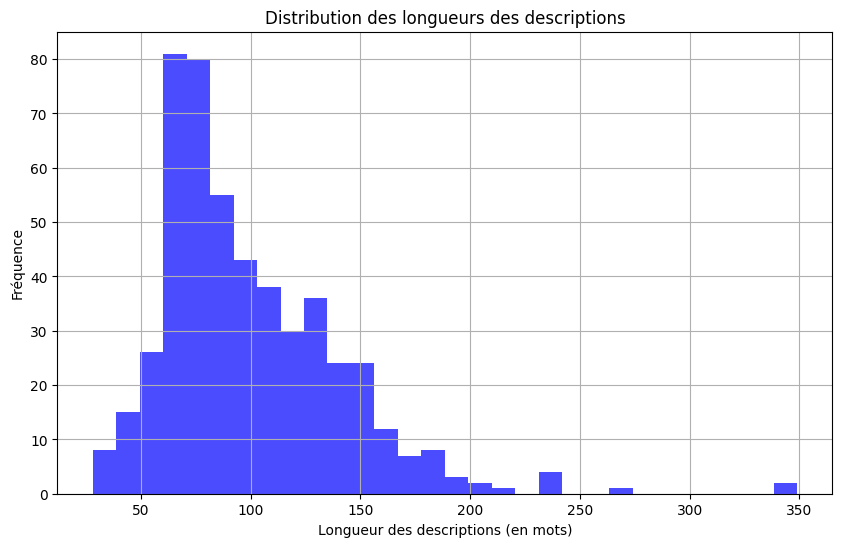

In [15]:
# Histogramme de la longueur des descriptions
plt.figure(figsize=(10, 6))
plt.hist(data['description_length'], bins=30, color='blue', alpha=0.7)
plt.title("Distribution des longueurs des descriptions")
plt.xlabel("Longueur des descriptions (en mots)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

La majorité des descriptions contiennent entre 50 et 100 mots, avec un pic autour de 60-80 mots, ce qui reflète des descriptions concises et informatives. Quelques descriptions plus longues (jusqu'à 350 mots) sont présentes, probablement pour des produits complexes. La distribution globale est cohérente et bien adaptée aux étapes suivantes comme le clustering ou le topic modeling.

## 3. Analyse de la fréquence des mots

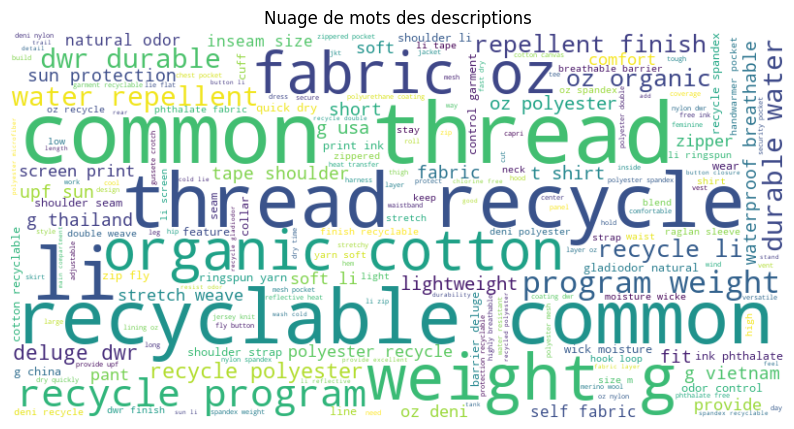

In [16]:
# Nuage de mots
all_words = " ".join(data['cleaned_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des descriptions")
plt.show()

Après avoir nettoyé les descriptions, cette visualisation met en lumière les mots les plus fréquemment utilisés dans le corpus. Des termes comme "recycle", "fabric", et "weight" se distinguent, suggérant une forte orientation des descriptions vers des aspects techniques et écologiques des produits. 

Ces observations soulignent des thématiques clés présentes dans les données, qui pourront être exploitées dans les prochaines étapes d’analyse pour regrouper les produits ou identifier des tendances communes.

In [17]:
# Analyse des mots les plus fréquents
word_counts = Counter(all_words.split()).most_common(20)
frequent_words = pd.DataFrame(word_counts, columns=['Mot', 'Fréquence'])

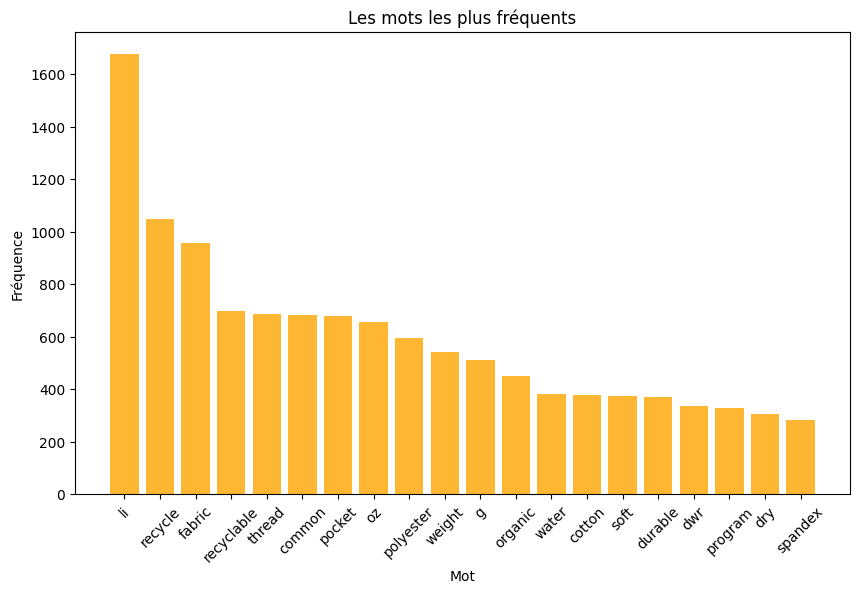

In [18]:
# Diagramme des mots les plus fréquents
plt.figure(figsize=(10, 6))
plt.bar(frequent_words['Mot'], frequent_words['Fréquence'], color='orange', alpha=0.8)
plt.title("Les mots les plus fréquents")
plt.xlabel("Mot")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

En prolongeant l’analyse des mots nettoyés, le calcul des fréquences met en avant les termes les plus représentatifs des descriptions. Les résultats confirment la récurrence de mots comme "recycle", "fabric", et "recyclable", déjà identifiés précédemment, renforçant leur importance dans le corpus. Cette étape apporte une validation supplémentaire de la cohérence des données et de leur structuration autour de thématiques clés, notamment la durabilité et les caractéristiques techniques des produits.

L'apparition de termes plus génériques comme "it" pourrait indiquer des nuances dans l’interprétation des descriptions. Ces observations consolident les bases pour exploiter ces tendances dans les phases de regroupement ou d'extraction de sujets.

## 4. Vectorisation TF-IDF (Term Frequency-Inverse Document Frequency)

La vectorisation TF-IDF transforme les descriptions en vecteurs numériques en pondérant les mots selon leur importance spécifique à chaque produit. Cette étape met en évidence les termes clés, comme le montre l'extraction des mots les plus significatifs pour un exemple de description. En parallèle, l’analyse des longueurs des descriptions via une boîte à moustaches permet d’explorer leur variabilité et de repérer d’éventuelles anomalies. Ensemble, ces étapes structurent les données textuelles pour préparer efficacement les analyses de regroupement et d’extraction thématique.

In [19]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['cleaned_description'])

In [20]:
# Affichage des mots clés TF-IDF les plus importants pour un échantillon
tfidf_sample = tfidf_matrix[0]
feature_array = vectorizer.get_feature_names_out()
tfidf_scores = list(zip(feature_array, tfidf_sample.toarray()[0]))
sorted_tfidf = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:10]
print("Top mots-clés TF-IDF pour la première description :")
print(sorted_tfidf)

Top mots-clés TF-IDF pour la première description :
[('boxer', 0.5547415705909651), ('traditional', 0.23726310565215442), ('classic', 0.18564688976250773), ('especially', 0.17164876707904939), ('reason', 0.17164876707904939), ('construction', 0.1679400120842732), ('brush', 0.16343940104113663), ('cult', 0.16097995062013626), ('situation', 0.16097995062013626), ('panel', 0.16091291213941653)]


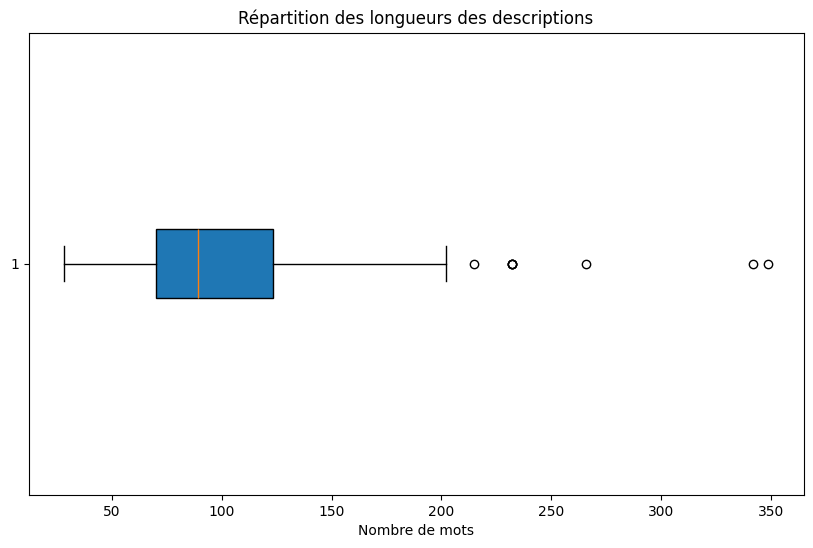

In [21]:
# Boîte à moustaches des longueurs de description
plt.figure(figsize=(10, 6))
plt.boxplot(data['description_length'], vert=False, patch_artist=True)
plt.title("Répartition des longueurs des descriptions")
plt.xlabel("Nombre de mots")
plt.show()

La majorité des descriptions se situent entre 50 et 150 mots, avec une médiane autour de 100 mots, tandis que quelques anomalies dépassent les 200 mots. Ces descriptions plus longues pourraient refléter des produits complexes et pourraient influencer les analyses comme le clustering ou le topic modeling.

## 5. Analyse de la diversité lexicale et des sentiments

Nous explorons ici deux caractéristiques complémentaires des descriptions pour affiner notre compréhension du corpus. La diversité lexicale, qui mesure la richesse du vocabulaire en calculant le ratio entre mots uniques et total de mots, révèle une structure modérément répétitive. Cela semble cohérent avec les tendances observées précédemment, où certains termes récurrents dominent les descriptions, probablement en lien avec des thèmes clés comme la durabilité et les propriétés techniques.

L’analyse des sentiments met en lumière une tonalité globalement neutre à légèrement positive dans les descriptions. Cela s’aligne avec leur objectif : informer les clients tout en valorisant les produits. Ces deux analyses offrent une perspective enrichie sur la structure et l’intention des textes, renforçant les bases pour des regroupements ou des extractions thématiques plus ciblés.

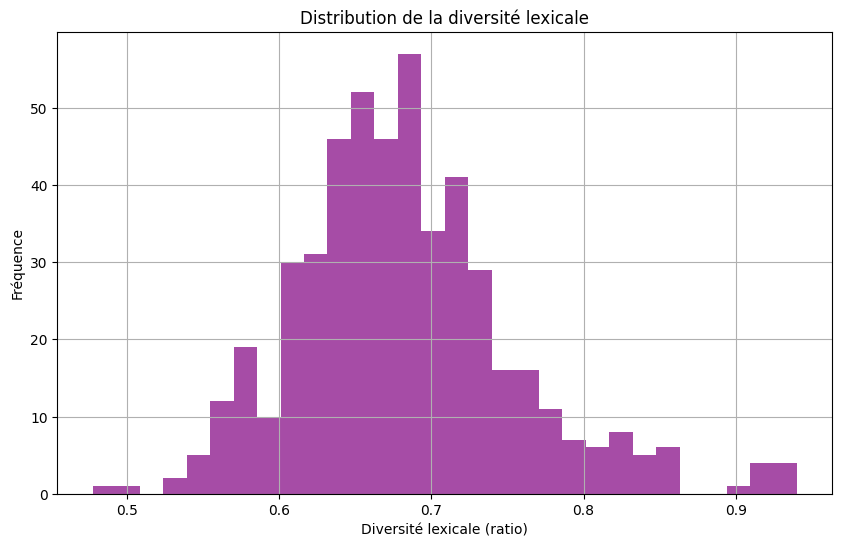

In [22]:
# Calcul et visualisation de la diversité lexicale
data['lexical_diversity'] = data['cleaned_description'].apply(lambda x: len(set(x.split())) / len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(data['lexical_diversity'], bins=30, color='purple', alpha=0.7)
plt.title("Distribution de la diversité lexicale")
plt.xlabel("Diversité lexicale (ratio)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


La diversité lexicale, majoritairement entre 0,6 et 0,7, reflète des descriptions modérément variées, cohérentes avec une structure standardisée observée précédemment. Les valeurs plus élevées signalent des descriptions plus riches, possiblement pour des produits spécifiques, tandis que les plus faibles (< 0,5) indiquent des contenus répétitifs. Ces variations pourraient jouer un rôle dans la qualité des regroupements lors du clustering.

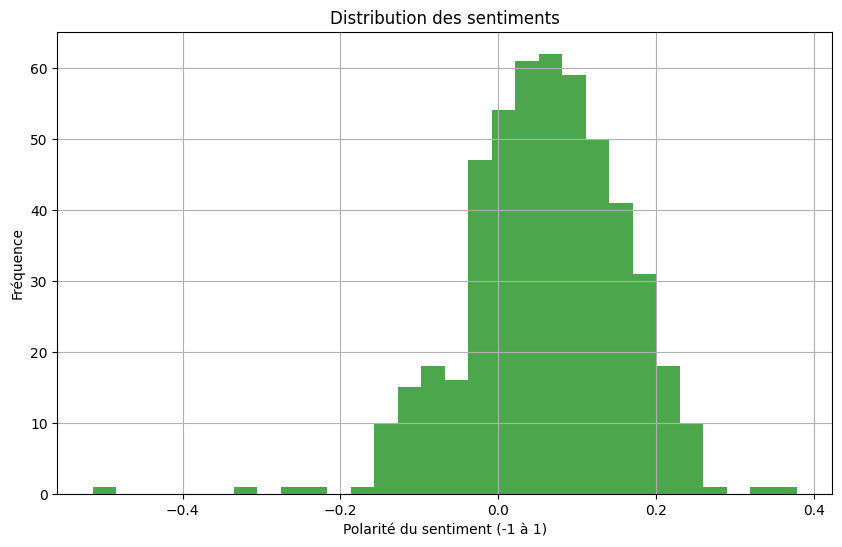

In [23]:
# Visualisation de la distribution des sentiments
data['sentiment'] = data['cleaned_description'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment'], bins=30, color='green', alpha=0.7)
plt.title("Distribution des sentiments")
plt.xlabel("Polarité du sentiment (-1 à 1)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


La distribution des sentiments est majoritairement centrée autour de 0, indiquant une tonalité neutre dans la plupart des descriptions, avec une légère tendance positive. Cela reflète un ton informatif et commercial, adapté pour mettre en valeur les produits sans exagération.

Les faibles occurrences de valeurs négatives ou fortement positives suggèrent que les descriptions évitent des tonalités trop émotionnelles. Cette neutralité pourrait favoriser des regroupements homogènes dans les analyses.

## 6. Clustering via PCA et Kmeans

Pour approfondir l’analyse des descriptions et explorer leur structure sous-jacente, nous allons utiliser deux approches complémentaires : la réduction dimensionnelle avec PCA (Principal Component Analysis) et le clustering avec K-Means.

La PCA permettra de réduire la complexité des données vectorisées tout en conservant leurs composantes principales, facilitant ainsi la visualisation des relations entre descriptions dans un espace bidimensionnel. Le clustering avec K-Means sera utilisé pour regrouper les descriptions en clusters basés sur leurs similarités textuelles, afin de mieux structurer le corpus et confirmer les tendances identifiées précédemment. 

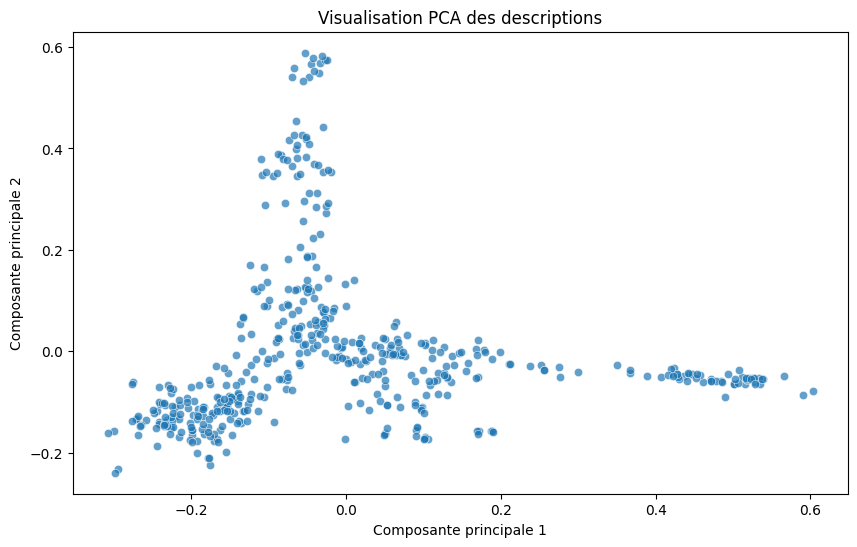

In [24]:
# Réduction de dimension avec PCA et visualisation des descriptions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], alpha=0.7)
plt.title("Visualisation PCA des descriptions")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

Cette projection PCA offre une vue simplifiée des descriptions de produits dans un espace bidimensionnel. Elle montre une certaine structuration des données, avec des regroupements visibles, bien qu’aucune frontière claire ne soit encore apparente. Cela suggère que des similarités sous-jacentes existent entre certaines descriptions, mais elles ne sont pas encore bien définies dans ce cadre réduit.

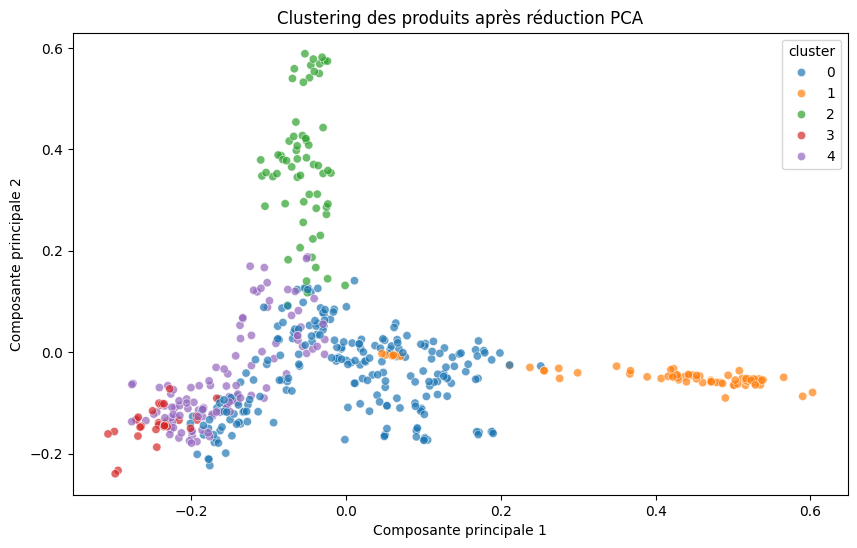

In [25]:
# Application du clustering K-Means et visualisation des clusters après réduction PCA
kmeans = KMeans(n_clusters=5, random_state=42) # prise de 5 cluster de façon arbitraire pour nos analyses
data['cluster'] = kmeans.fit_predict(tfidf_matrix)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data['cluster'], palette='tab10', alpha=0.7)
plt.title("Clustering des produits après réduction PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


Les descriptions sont réparties en cinq clusters, révélant des similarités textuelles sous-jacentes. Certains regroupements, comme ceux de couleur orange à droite, semblent bien définis et homogènes, tandis que d'autres, comme les clusters violet et rouge, se chevauchent davantage, indiquant des frontières moins nettes.

Ces clusters offrent une première segmentation des produits basée sur leurs descriptions textuelles. 

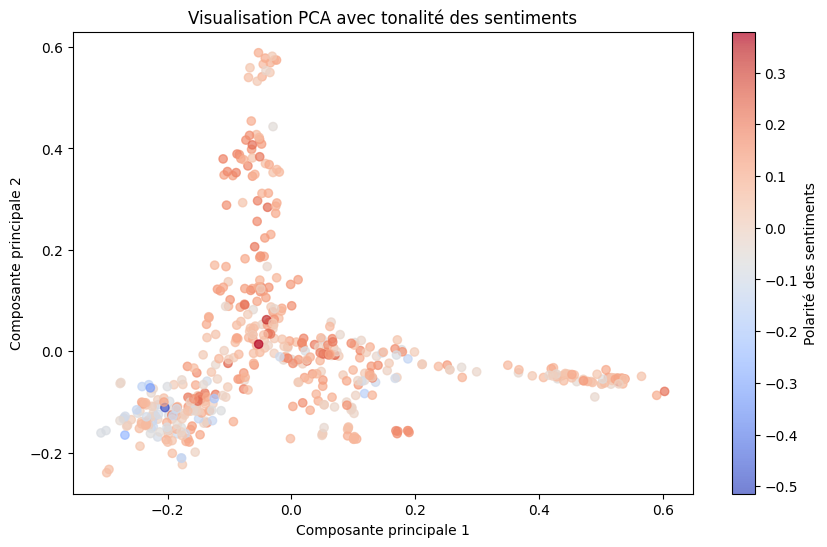

In [26]:
# Visualisation des sentiments après réduction PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], 
                      c=data['sentiment'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label="Polarité des sentiments")
plt.title("Visualisation PCA avec tonalité des sentiments")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

En superposant la tonalité des sentiments à la réduction PCA, nous obtenons une nouvelle perspective sur la structuration des descriptions. Nous pouvons constater que les tonalités neutres à légèrement positives (en rouge clair) dominent, ce qui est cohérent avec l'objectif informatif des descriptions. Les sentiments négatifs (en bleu) sont rares et dispersés, ce qui pourrait indiquer des exceptions ou des descriptions atypiques.

Cette visualisation enrichit les deux précédentes en ajoutant une dimension émotionnelle. Elle suggère que certains clusters (observés dans le graphique précédent) présentent une homogénéité sentimentale, tandis que d'autres regroupements affichent une plus grande diversité, ce qui pourrait refléter des variations dans les styles rédactionnels ou dans les types de produits décrits.

# Pipeline du modèle

## Clustering Kmeans

Nous réutilisons l’algorithme K-Means pour regrouper les descriptions de produits en clusters homogènes, en nous appuyant sur la matrice TF-IDF construite lors des analyses précédentes. Ce regroupement approfondit les observations initiales sur les similarités textuelles en structurant explicitement les données.

Avant d’appliquer le clustering, nous appliquons la méthode Elbow pour déterminer un nombre optimal de clusters, en identifiant un point de ralentissement clair dans la diminution de l’inertie, assurant un bon équilibre entre granularité et cohérence.

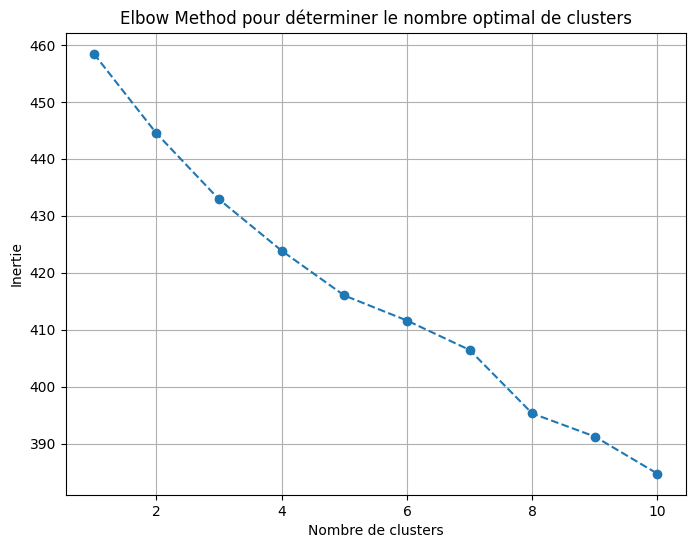

In [27]:
# Calcul de l'inertie pour différents nombres de clusters
inertia = []
range_clusters = range(1, 11)  # Tester pour 1 à 10 clusters
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Trace la courbe d'inertie
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title("Elbow Method pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()


Le graphique Elbow montre une diminution progressive de l'inertie avec l'augmentation du nombre de clusters. Un point de ralentissement notable apparaît autour de 5 clusters, ce qui suggère un bon compromis entre cohérence des groupes et segmentation granulaire. Ce choix sera retenu pour la suite de l'analyse.

In [28]:
# Pipeline de clustering
def create_clustering_pipeline(data, tfidf_matrix, n_clusters=5):
    """
    Crée un pipeline pour effectuer le clustering avec K-Means et analyse les clusters.

    Args:
    - data (pd.DataFrame): DataFrame contenant les descriptions nettoyées.
    - tfidf_matrix (scipy.sparse.csr_matrix): Matrice TF-IDF issue de l'EDA.
    - n_clusters (int): Nombre optimal de clusters déterminé précédemment.

    Returns:
    - data (pd.DataFrame): DataFrame avec la colonne 'cluster' ajoutée.
    - kmeans: Modèle K-Means entraîné.
    """
    # Clustering avec K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(tfidf_matrix)
    
    # Évaluation des clusters
    silhouette_avg = silhouette_score(tfidf_matrix, data['cluster'])
    print(f"Silhouette Score moyen des clusters avec {n_clusters} clusters : {silhouette_avg}")
    
    return data, kmeans





Le Silhouette Score, ici, nous permet de valider l’utilité des clusters dans notre contexte. En mesurant leur cohérence, il garantit que ces regroupements sont suffisamment distincts et exploitables pour des tâches comme la recommandation. Ces clusters fournissent une base robuste pour relier les produits similaires, enrichissant ainsi notre stratégie d’amélioration de la navigation et de la personnalisation sur le site.

In [29]:
# Exécute le pipeline avec 5 clusters
data, kmeans_model = create_clustering_pipeline(data, tfidf_matrix, n_clusters=5)

# Sauvegarde les clusters
data[['id', 'cluster']].to_csv("clusters_output.csv", index=False)


Silhouette Score moyen des clusters avec 5 clusters : 0.041153976593570334


Bien que le Silhouette score moyen de 0.041 soit faible, cela ne rend pas le clustering inutile dans notre contexte. Ce score indique que les frontières entre les clusters sont floues, mais cela peut s'expliquer par des descriptions de produits homogènes ou des caractéristiques textuelles qui ne capturent pas entièrement la diversité des données.(limitations de la représentation TF-IDF).

Ces regroupements, bien qu’imparfaits, sont utiles pour établir des bases de recommandations en suggérant des produits au sein d’un même cluster. Ils offrent également un cadre pour relier les produits à des sujets latents ou pour affiner les analyses qualitatives. L’approche reste pertinente pour améliorer l’organisation et l’expérience utilisateur, même avec des résultats partiellement définis.

## Fonctions de recommendations

## Recommandations par scores de similarité cosinus

Pour enrichir notre système de recommandations, nous introduisons une fonction qui combine les résultats du clustering avec une mesure de similarité cosinus. Cette méthode offre une double garantie : elle permet de regrouper les produits similaires en se basant sur leurs caractéristiques textuelles globales, tout en affinant ces regroupements grâce à une analyse de proximité plus précise.

Le processus commence par un filtrage des produits au sein d’un même cluster, en utilisant les résultats de notre modèle K-Means. Ce premier niveau de sélection assure une cohérence globale des suggestions en limitant la comparaison à des produits partageant des caractéristiques générales similaires avec le produit de référence.


In [30]:
# Affiche la formule mathématique
display(Math(r"\text{Similarité cosinus}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}"))
display(Math(r"\text{où : }"))
display(Math(r"A \cdot B = \sum_{i=1}^{n} A_i B_i, \quad \|A\| = \sqrt{\sum_{i=1}^{n} A_i^2}, \quad \|B\| = \sqrt{\sum_{i=1}^{n} B_i^2}"))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Cette formule calcule la similarité entre deux vecteurs \( A \) et \( B \), qui, dans notre cas, correspondent aux vecteurs TF-IDF des descriptions de produits. 

- Le produit scalaire \( A \cdot B \) mesure la somme des produits de chaque composante des deux vecteurs.
- Les normes \( \|A\| \) et \( \|B\| \) correspondent à la "longueur" des vecteurs dans un espace multidimensionnel.
- La division par le produit des normes normalise le résultat pour que la similarité soit indépendante de la longueur des vecteurs. Cela garantit que la similarité cosinus prend une valeur entre -1 et 1. Une valeur proche de 1 indique une forte similitude textuelle entre deux descriptions.

Une fois ce filtrage effectué, la similarité cosinus intervient pour hiérarchiser les produits en fonction de leur proximité sémantique avec le produit ciblé. Cette métrique compare les vecteurs TF-IDF associés aux descriptions textuelles, indépendamment de leur longueur, et identifie ainsi les produits les plus pertinents.


En intégrant les clusters et la similarité cosinus, le système capitalise sur les forces des deux méthodes pour proposer des recommandations à la fois pertinentes et adaptées. Cette approche renforce l’efficacité du modèle en exploitant pleinement les analyses textuelles réalisées précédemment, tout en facilitant une navigation plus personnalisée pour les utilisateurs.


In [31]:
# Recommande des produits similaires avec des scores de similarité cosinus.
def find_similar_items_with_scores(product_id, data, tfidf_matrix, n_recommendations=5):
    """
    Args:
    - product_id (int): L'ID du produit de référence.
    - data (pd.DataFrame): Le dataframe contenant les informations sur les produits.
    - tfidf_matrix (sparse matrix): Matrice TF-IDF des descriptions.
    - n_recommendations (int): Nombre de produits à recommander. 
    """
    
    # Trouve l'index du produit dans la matrice TF-IDF
    product_idx = data.index[data['id'] == product_id].tolist()[0]
    product_vector = tfidf_matrix[product_idx]

    # Calcule les similarités cosinus
    similarities = cosine_similarity(product_vector, tfidf_matrix).flatten()

    # Filtre les produits dans le même cluster
    product_cluster = data.loc[data['id'] == product_id, 'cluster'].values[0]
    similar_items = data[data['cluster'] == product_cluster].copy()

    # Ajoute les similarités aux produits similaires
    similar_items['similarity'] = similarities[similar_items.index]

    # Trie par similarité
    similar_items = similar_items[similar_items['id'] != product_id]
    similar_items = similar_items.sort_values(by='similarity', ascending=False)

    # Retourne les recommandations
    return similar_items['id'].head(n_recommendations).tolist()

# Test la fonction
sample_product_id = data['id'].iloc[0]
recommended_items = find_similar_items_with_scores(sample_product_id, data, tfidf_matrix)
print(f"Produits recommandés pour le produit {sample_product_id} : {recommended_items}")


Produits recommandés pour le produit 1 : [19, 494, 495, 442, 18]


## Recommandations par analyse latents avec LSA

Pour compléter notre analyse des descriptions de produits, cette fonction explore les sujets latents à l’aide de la méthode LSA (Latent Semantic Analysis). Là où la fonction précédente utilisait les similarités cosinus pour établir des relations directes entre produits, cette approche vise à identifier des thèmes globaux en décomposant les descriptions en concepts sous-jacents. Cela permet d'aller au-delà des simples similarités textuelles pour comprendre les tendances principales qui structurent les descriptions.

En complément du clustering, cette analyse thématique apporte une dimension interprétative en regroupant les produits autour de notions partagées. Les nuages de mots associés aux sujets offrent une visualisation claire de ces thèmes, renforçant notre compréhension du contenu textuel. Cette méthode peut également guider une meilleure organisation des produits ou enrichir le système de recommandations en incorporant des thématiques identifiées.

In [32]:
# Analyse les sujets latents avec LSA et affiche les mots-clés principaux.
def analyze_topics_with_lsa(tfidf_matrix, vectorizer, n_topics=5):
    """
    Args:
    - tfidf_matrix (scipy.sparse.csr_matrix): Matrice TF-IDF existante.
    - vectorizer (TfidfVectorizer): Vectoriseur TF-IDF utilisé pour générer la matrice.
    - n_topics (int): Nombre de sujets latents à extraire.
    
    """
    # Applique LSA pour extraire les sujets
    lsa = TruncatedSVD(n_components=n_topics, random_state=42)
    topic_matrix = lsa.fit_transform(tfidf_matrix)

    # Obtenir les noms des termes
    terms = vectorizer.get_feature_names_out()

    # Extrait les mots-clés pour chaque sujet
    topics = {}
    for i, component in enumerate(lsa.components_):
        valid_indices = [idx for idx in component.argsort()[-10:] if idx < len(terms)]
        topic_terms = [terms[idx] for idx in valid_indices]
        topics[f"Sujet {i+1}"] = topic_terms

    # Génére des nuages de mots pour chaque sujet
    for i, component in enumerate(lsa.components_):
        topic_terms_weights = {terms[idx]: component[idx] for idx in component.argsort()[-50:] if idx < len(terms)}
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic_terms_weights)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Nuage de mots pour le sujet {i+1}")
        plt.show()
    
    return topics, topic_matrix, lsa



Nous établissons ici un lien entre les clusters générés et les sujets identifiés à travers l’analyse thématique. En reliant les sujets dominants aux clusters, cela nous permet d’approfondir notre compréhension des regroupements et de vérifier leur pertinence sémantique. Cette intégration thématique ajoute une nouvelle couche d’analyse en mettant en évidence les thèmes principaux qui structurent les clusters, tout en facilitant l'exploration des produits associés à des sujets spécifiques.

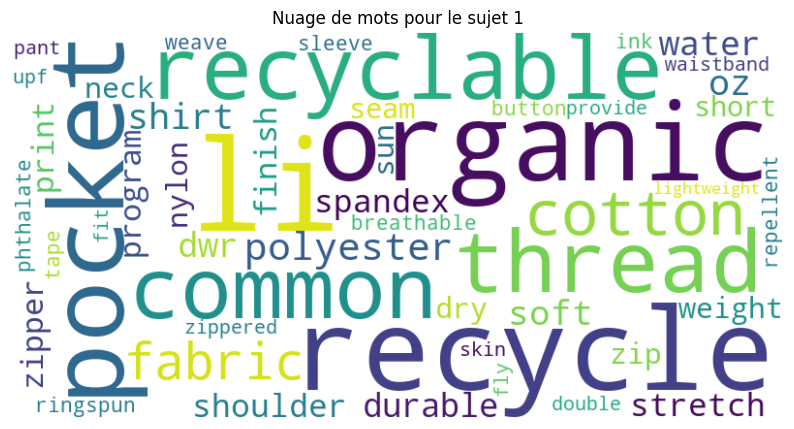

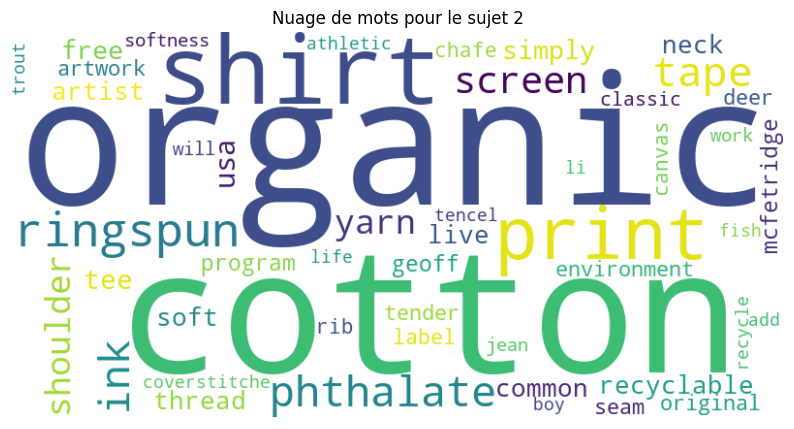

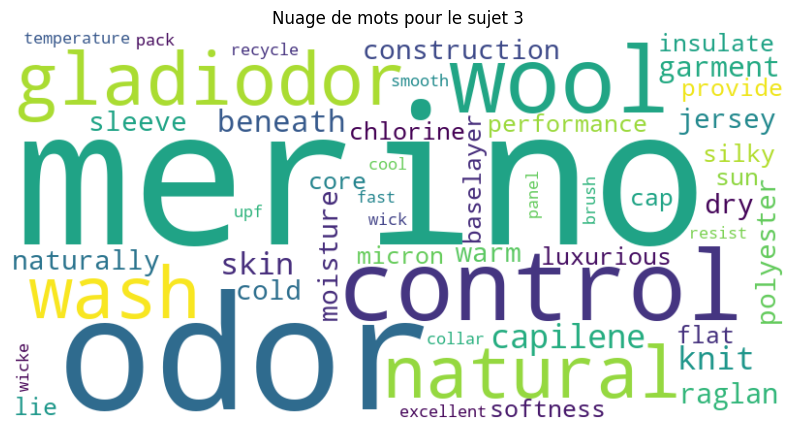

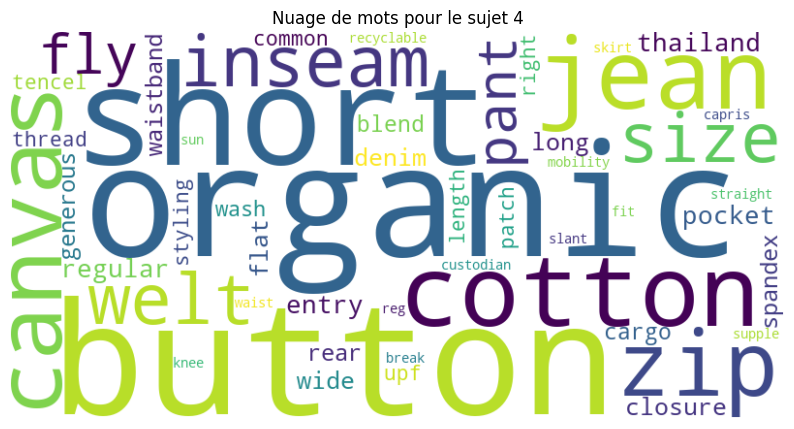

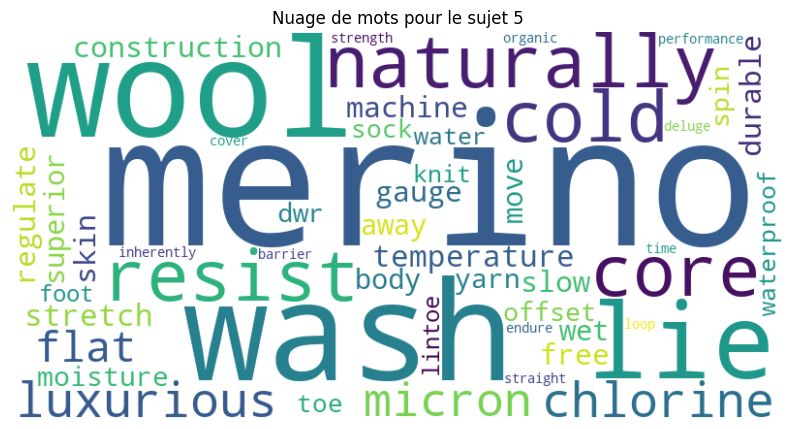

Sujet dominant par cluster :
cluster
0    0
1    1
2    2
3    0
4    0
Name: main_topic, dtype: int64
Produits liés au sujet 0 :
   id                                        description
0   1  Active classic boxers - There's a reason why o...
1   2  Active sport boxer briefs - Skinning up Glory ...
2   3  Active sport briefs - These superbreathable no...
3   4  Alpine guide pants - Skin in, climb ice, switc...
4   5  Alpine wind jkt - On high ridges, steep ice an...


In [33]:
# Obtenir les sujets et la matrice des sujets
topics, topic_matrix, lsa = analyze_topics_with_lsa(tfidf_matrix, vectorizer)

# Ajoute les sujets dominants au dataframe
data['main_topic'] = topic_matrix.argmax(axis=1)

# Relie les sujets aux clusters
cluster_topics = data.groupby('cluster')['main_topic'].apply(lambda x: x.value_counts().idxmax())
print("Sujet dominant par cluster :")
print(cluster_topics)

# Explore les produits associés à un sujet spécifique
topic_id = 0  # Exemple : premier sujet
products_in_topic = data[data['main_topic'] == topic_id]
print(f"Produits liés au sujet {topic_id} :")
print(products_in_topic[['id', 'description']].head())



## Recommandation par cluster et sujet

Pour affiner davantage le système de recommandation, nous introduisons une méthode qui combine l’analyse des clusters et des sujets principaux. En intégrant ces deux dimensions, cette approche vise à dépasser les limites des techniques précédentes, qui utilisaient soit les clusters seuls, soit les similarités cosinus, pour proposer des recommandations plus pertinentes.

En pratique, cette méthode commence par identifier les produits appartenant au même cluster que le produit de référence, tout en vérifiant leur appartenance au même sujet principal. Une fois cette première sélection effectuée, les similarités cosinus entre les descriptions du produit cible et celles des autres produits dans ce groupe sont calculées pour affiner le classement final des recommandations.

Grâce à cette combinaison, nous cherchons à garantir une cohérence thématique tout en maximisant la pertinence textuelle, apportant ainsi une réponse plus nuancée aux besoins d’un système de recommandation basé sur des descriptions textuelles.

In [34]:
# Recommande des produits similaires en tenant compte des clusters et des sujets.
def recommend_by_cluster_and_topic(product_id, data, tfidf_matrix, n_recommendations=5):
    """
    Args:
    - product_id (int): ID du produit de référence.
    - data (pd.DataFrame): DataFrame contenant les clusters et sujets.
    - tfidf_matrix (csr_matrix): Matrice TF-IDF des descriptions.
    - n_recommendations (int): Nombre de recommandations.

    """
    # Trouver le cluster et le sujet principal du produit
    product_cluster = data.loc[data['id'] == product_id, 'cluster'].values[0]
    product_topic = data.loc[data['id'] == product_id, 'main_topic'].values[0]
    
    # Filtre les produits du même cluster et sujet
    similar_items = data[(data['cluster'] == product_cluster) & (data['main_topic'] == product_topic)]
    
    # Exclu le produit lui-même
    similar_items = similar_items[similar_items['id'] != product_id]
    
    # Calcule les similarités cosinus
    product_idx = data.index[data['id'] == product_id].tolist()[0]
    product_vector = tfidf_matrix[product_idx]
    similarities = cosine_similarity(product_vector, tfidf_matrix).flatten()
    
    # Ajoute les similarités et trier par pertinence
    similar_items['similarity'] = similar_items.index.map(lambda idx: similarities[idx])
    recommendations = similar_items.sort_values(by='similarity', ascending=False)['id'].head(n_recommendations).tolist()
    
    return recommendations

# Test la nouvelle fonction
sample_product_id = data['id'].iloc[0]
recommended_items = recommend_by_cluster_and_topic(sample_product_id, data, tfidf_matrix)
print(f"Produits recommandés pour le produit {sample_product_id} : {recommended_items}")


Produits recommandés pour le produit 1 : [19, 494, 495, 18, 61]


# Encapsulation du modèle

Pour structurer notre approche et améliorer la lisibilité et la maintenabilité du pipeline, nous encapsulons les étapes principales dans une classe dédiée. Cette encapsulation regroupe les processus clés, à savoir l’intégration des clusters, l’analyse des sujets dominants et la génération de recommandations basées sur les similarités cosinus.

En procédant ainsi, nous consolidons les différentes étapes de notre travail précédent dans un cadre unifié, facilitant non seulement la réutilisation des résultats intermédiaires, mais aussi leur adaptation à de nouveaux besoins. Par exemple, les clusters obtenus avec K-Means et les sujets extraits via LSA sont intégrés directement dans le DataFrame, offrant une structure exploitable pour analyser les relations entre les produits. De plus, le processus de recommandation est renforcé par cette centralisation, permettant une génération plus efficace de suggestions en tenant compte des clusters, des sujets et des similarités textuelles.

Tout cela favorise une approche modulaire, où chaque étape peut être ajustée ou remplacée sans altérer le pipeline global, rendant le système plus robuste et extensible à des scénarios futurs.

In [35]:
# Encapsulation des étapes de clustering, d'analyse des sujets et de recommandation.
class SimplifiedProductPipeline:
    def __init__(self, tfidf_matrix, cluster_model, topic_model): # Initialise le pipeline avec la matrice TF-IDF, le modèle de clustering et le modèle de sujets.
        self.tfidf_matrix = tfidf_matrix  # Matrice TF-IDF utilisée pour analyser les descriptions
        self.cluster_model = cluster_model  # Modèle K-Means pour le clustering
        self.topic_model = topic_model  # Modèle LSA pour l'analyse des sujets

    # Ajoute les clusters au DataFrame s'ils n'existent pas encore.
    def integrate_clusters(self, data):
        # Vérifie si les clusters ont déjà été ajoutés
        if 'cluster' not in data.columns:
            # Ajoute les clusters en utilisant les labels du modèle K-Means
            data['cluster'] = self.cluster_model.labels_
        return data

    # Ajoute les sujets dominants au DataFrame s'ils n'existent pas encore.
    def integrate_topics(self, data):
        # Transforme la matrice TF-IDF en une matrice de sujets via LSA
        topic_matrix = self.topic_model.transform(self.tfidf_matrix)  
        # .transform() applique le modèle LSA à la matrice existante pour obtenir les scores des sujets
        
        # Ajoute le sujet principal (indice avec le score maximal) pour chaque produit
        if 'main_topic' not in data.columns:
            data['main_topic'] = topic_matrix.argmax(axis=1)  
            # .argmax(axis=1) retourne l'indice du sujet ayant le score le plus élevé pour chaque produit
        return data
    
    # Recommande des produits similaires en fonction des clusters et des sujets.
    def recommend(self, product_id, data, n_recommendations=5):
        # Identifie le cluster et le sujet principal du produit cible
        product_cluster = data.loc[data['id'] == product_id, 'cluster'].values[0]
        product_topic = data.loc[data['id'] == product_id, 'main_topic'].values[0]
        
        # Filtre les produits du même cluster et sujet
        similar_items = data[(data['cluster'] == product_cluster) & 
                             (data['main_topic'] == product_topic)]
        # Exclut le produit de référence
        similar_items = similar_items[similar_items['id'] != product_id]
        
        # Récupère le vecteur TF-IDF du produit cible
        product_idx = data.index[data['id'] == product_id].tolist()[0]
        product_vector = self.tfidf_matrix[product_idx]  # Récupère la représentation vectorielle du produit
        
        # Calcule les similarités cosinus entre le produit cible et tous les autres
        similarities = cosine_similarity(product_vector, self.tfidf_matrix).flatten()
        
        # Mappe les similarités cosinus aux produits similaires
        similar_items['similarity'] = similar_items.index.map(lambda idx: similarities[idx])
        
        # Trie les produits similaires par score de similarité
        recommendations = similar_items.sort_values(by='similarity', ascending=False)['id'].head(n_recommendations).tolist()
        
        return recommendations

In [36]:
# Initialisation de la classe
pipeline = SimplifiedProductPipeline(
    tfidf_matrix=tfidf_matrix, 
    cluster_model=kmeans_model, 
    topic_model=lsa
)


 Après avoir initialisé cette classe avec les modèles et la matrice TF-IDF précédemment définis, nous intégrons les informations de clusters et de sujets dominants directement dans notre dataset. Cela permet une exploitation homogène des données enrichies. En guise d'exemple, nous utilisons cette structure pour recommander des produits similaires à partir d'un produit donné, en tenant compte des clusters, des sujets dominants et des similarités cosinus calculées. 

In [37]:
# Intégration des clusters et des sujets
data = pipeline.integrate_clusters(data)
data = pipeline.integrate_topics(data)


In [38]:
# Recommandation d'exemple
sample_product_id = data['id'].iloc[0]
recommended_items = pipeline.recommend(sample_product_id, data)
print(f"Produits recommandés pour le produit {sample_product_id} : {recommended_items}")


Produits recommandés pour le produit 1 : [19, 494, 495, 18, 61]


Ainsi le processus illustre concrètement la manière dont notre pipeline permet de générer des recommandations pertinentes, tout en restant flexible et réutilisable pour d'autres applications comme le démontre le résultats des produits recommanders

# Evaluation du modèle de recommandation

## Examen manuel des recommandations

Les recommandations générées par le modèle peuvent être évaluées sur plusieurs aspects pour juger de leur pertinence. Une première approche consiste à examiner qualitativement les descriptions des produits recommandés par rapport au produit de référence.

In [39]:
# Produit de référence
sample_product_id = data['id'].iloc[0]
reference_product = data.loc[data['id'] == sample_product_id, 'description'].values[0]

# Recommandations
recommended_items = pipeline.recommend(sample_product_id, data)
recommended_descriptions = data[data['id'].isin(recommended_items)]['description']

print(f"Produit de référence ({sample_product_id}):\n{reference_product}\n")
print("Produits recommandés :")
for idx, desc in enumerate(recommended_descriptions, start=1):
    print(f"{idx}. {desc}\n")


Produit de référence (1):
Active classic boxers - There's a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight:

Dans ce cas, les descriptions montrent que les produits partagent des caractéristiques similaires : tous utilisent du polyester recyclé, offrent des propriétés de contrôle de l’humidité et des odeurs, et sont adaptés aux activités physiques ou aux voyages. Cette cohérence dans les descriptions suggère que le modèle identifie bien des produits partageant des fonctions ou des usages communs, ce qui indique une pertinence qualitative initiale.

## Validation par similarités cosinus

D’un point de vue quantitatif, les scores de similarité cosinus permettent de mesurer la proximité textuelle entre le produit de référence et les produits recommandés.

In [40]:
# Calcul des similarités cosinus pour les recommandations
product_idx = data.index[data['id'] == sample_product_id].tolist()[0]
product_vector = tfidf_matrix[product_idx]
similarities = cosine_similarity(product_vector, tfidf_matrix).flatten()

# Affiche les similarités des produits recommandés
for rec_id in recommended_items:
    rec_idx = data.index[data['id'] == rec_id].tolist()[0]
    print(f"Produit recommandé (ID {rec_id}): Similarité cosinus = {similarities[rec_idx]:.2f}")


Produit recommandé (ID 19): Similarité cosinus = 0.46
Produit recommandé (ID 494): Similarité cosinus = 0.40
Produit recommandé (ID 495): Similarité cosinus = 0.29
Produit recommandé (ID 18): Similarité cosinus = 0.26
Produit recommandé (ID 61): Similarité cosinus = 0.22


 Ici, les scores varient entre 0.46 (élevé) et 0.22 (faible). Un score élevé, comme 0.46, indique une forte similarité dans les descriptions, ce qui valide l’efficacité de la méthode. Cependant, les scores plus faibles, tels que 0.22, pourraient refléter des liens moins évidents ou des produits plus éloignés contextuellement. Une analyse plus approfondie pourrait déterminer un seuil minimal à partir duquel une recommandation est jugée acceptable.

## Examen de la distribution des clusters

In [41]:
# Cluster du produit de référence
reference_cluster = data.loc[data['id'] == sample_product_id, 'cluster'].values[0]
print(f"Produit de référence ({sample_product_id}) appartient au cluster {reference_cluster}.")

# Vérifie les clusters des produits recommandés
for rec_id in recommended_items:
    rec_cluster = data.loc[data['id'] == rec_id, 'cluster'].values[0]
    print(f"Produit recommandé (ID {rec_id}) appartient au cluster {rec_cluster}.")


Produit de référence (1) appartient au cluster 2.
Produit recommandé (ID 19) appartient au cluster 2.
Produit recommandé (ID 494) appartient au cluster 2.
Produit recommandé (ID 495) appartient au cluster 2.
Produit recommandé (ID 18) appartient au cluster 2.
Produit recommandé (ID 61) appartient au cluster 2.


Par ailleurs, tous les produits recommandés appartiennent au même cluster que le produit de référence (cluster 2). Cela montre que le modèle respecte la segmentation thématique ou fonctionnelle des données. Cela renforce l’idée que les clusters définis par le K-Means capturent une certaine cohérence dans les données, permettant de regrouper des produits ayant des similarités structurelles.

# Conclusion

Bien que les résultats semblent pertinents sur la base des données textuelles et des clusters, il est important de les valider dans un contexte métier. Par exemple, si les recommandations doivent offrir une alternative ou une complémentarité, les résultats actuels semblent alignés sur ces attentes. Cependant, une validation utilisateur serait nécessaire pour confirmer que ces recommandations répondent aux besoins réels des clients.

# Axes d'améliorations 

Voici mes axes d'amélioration pour améliorer ce projet :
    
* **Optimisation du clustering** : Bien que la méthode Elbow et le Silhouette Score aient guidé le choix des clusters, une approche plus robuste comme l'utilisation de techniques avancées telles que le DBSCAN  pourrait être envisagée. Cela permettrait de mieux gérer les données ayant des distributions complexes ou des relations non linéaires.

* **Validation des recommandations** : Actuellement, l'évaluation des recommandations repose principalement sur l'observation qualitative. Un futur développement pourrait intégrer des métriques quantitatives spécifiques, comme le Mean Average Precision (MAP), pour valider l'efficacité des recommandations. Par ailleurs, des tests utilisateurs réels pourraient fournir des retours précieux sur la pertinence des suggestions.

* **Utilisation d'embeddings préentraînés** : La matrice TF-IDF utilisée pour le clustering pourrait être remplacée ou enrichie par des représentations vectorielles plus riches issues de modèles de Deep Learning tels que BERT ou FastText. Bien que ces modèles s'appuient sur des techniques supervisées pour leur entraînement, leur application ici permettrait de capturer des relations sémantiques plus subtiles et complexes entre les descriptions, offrant une alternative plus robuste à l'approche actuelle tout en respectant l'objectif initial d'analyse non supervisée.

* **Prise en compte des données complémentaires** : Le projet se concentre actuellement uniquement sur les descriptions textuelles. L’ajout de données supplémentaires, comme les catégories de produits, les prix ou les avis des utilisateurs, pourrait améliorer les regroupements et recommandations.

* **Analyse approfondie des clusters** : Bien que nous ayons identifié des sujets dominants au sein des clusters, une analyse qualitative plus approfondie des regroupements pourrait révéler des tendances ou insights inattendus, utiles pour les stratégies marketing ou la segmentation.

* **Évaluation des clusters avec d'autres scores** : En plus du Silhouette Score, d'autres indicateurs comme le Calinski-Harabasz Index ou le Davies-Bouldin Score pourraient offrir une perspective complémentaire sur la qualité des clusters formés.